<a href="https://colab.research.google.com/github/devan1510/machine-learning-projects/blob/main/BitPredict_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin Price Prediction
In this project, firstly we are going to do some analysis of the bitcoin prices like detecting outliers, pattern and structure in the time series using ACF and PACF plots and try to extract trend, seasonality and cyclicity using seasonal decomposition.
Further on we use various machine learning models to forecast the bitcoin prices into the future and will try to evaluate the performance of each model.
In the end, we will discuss the turkey problem found while forecasting bitcoin prices using timeseries analysis.

In [ ]:
# Import required libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [ ]:
# download the dataset
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-04-18 12:05:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2025-04-18 12:05:37 (5.11 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
# gather information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# get the bitcoin price and the timesteps
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"}).asfreq('D').reset_index()
bitcoin_prices.head()

,Date,Price
0,2013-10-01,123.65499
1,2013-10-02,125.45500
2,2013-10-03,108.58483
3,2013-10-04,118.67466
4,2013-10-05,121.33866


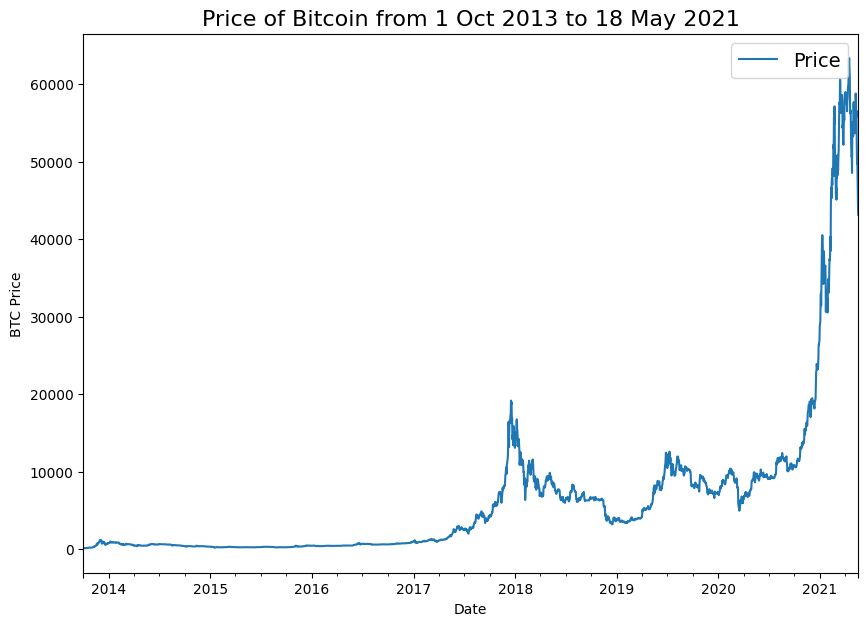

In [ ]:
# plot the entire series through out the period
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

# Experiment 1: ACF and PACF and Seasonal Decomposition


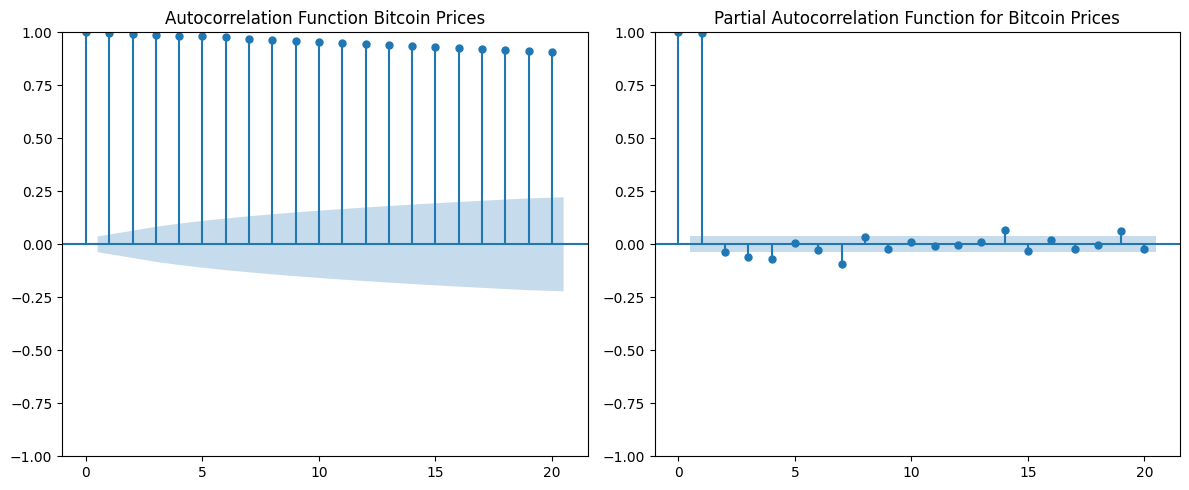

In [ ]:
plt.figure(figsize=(12, 5))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(bitcoin_prices.Price, ax=plt.gca(), lags=20)
plt.title("Autocorrelation Function Bitcoin Prices")

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(bitcoin_prices.Price, ax=plt.gca(), lags=20, method='ywm')
plt.title("Partial Autocorrelation Function for Bitcoin Prices")

plt.tight_layout()
plt.show()


**Comments:**essential tools in time series analysis used to identify patterns and structure within the data.

**ACF**:plot shows the correlation of a time series with itself at different lags
The ACF plot shows that there is a strong positive autocorrelation in the bitcoin prices.

**PACF**:PACF plot shows the partial correlation of the time series with itself at different lags.There is a **strong** +ve correlation at 1st and 2nd lag values and weak +ve correlation at 14th and 19th lag values.
Also there seems to a some -ve correlation among at 3rd,4thand 7th lag values.

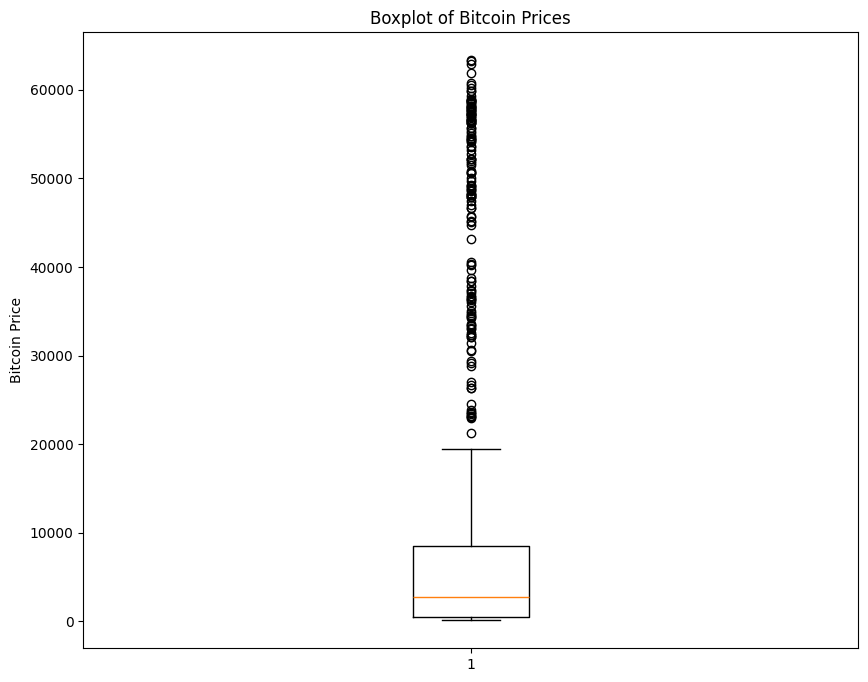

In [ ]:
# make a box plot to get an idea of the data distribution of the bitcoin prices
plt.figure(figsize = (10,8))
plt.boxplot(bitcoin_prices.Price)
plt.title('Boxplot of Bitcoin Prices')
plt.ylabel('Bitcoin Price')
plt.show()

**Comments:** we can observe from the box plot that there are lot of outliers, which is very obvious since we are dealing with bitcoin prices which is very tentative and fluctuates regularly.

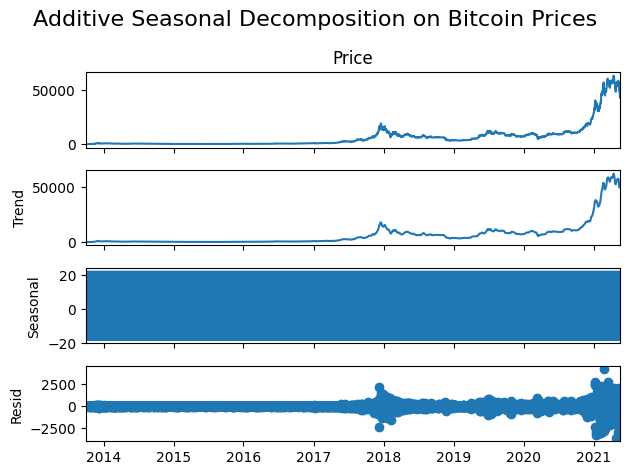

In [ ]:
# perform seasonal decomposition to extract Trend, Seasonality, Residual
result = seasonal_decompose(bitcoin_prices.Price, model='additive')
result.plot()
plt.suptitle('Additive Seasonal Decomposition on Bitcoin Prices', fontsize=16)
plt.tight_layout()
plt.show()

**Comments**:There does not seem to be much trend and seasonality component in the time series which is again something we can expect considering the volatile nature of the data.

**Perform train and test split for model training**

In [ ]:
# Split the dataset into train and test sets

# Since we are working with temporal data(a data that is related to a time period)
# using scikit learn's train_test_split is not an option
# because we can not have random samples of bitcoin prices in train and test datasets
# we need to distribute the data sequentially

# using 80/20 split for train-test split

# get the index and bitcoin prices
timesteps = bitcoin_prices.Date.to_numpy()
prices = bitcoin_prices.Price.to_numpy()

# view a sample data
timesteps[:3],prices[:3]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483]))

In [ ]:
# Create train data splits (everything before the split)
X_train, y_train = timesteps[:int(0.8 * len(prices))], prices[:int(0.8 * len(prices))]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[int(0.8 * len(prices)):], prices[int(0.8 * len(prices)):]

Text(0, 0.5, 'BTC Price')

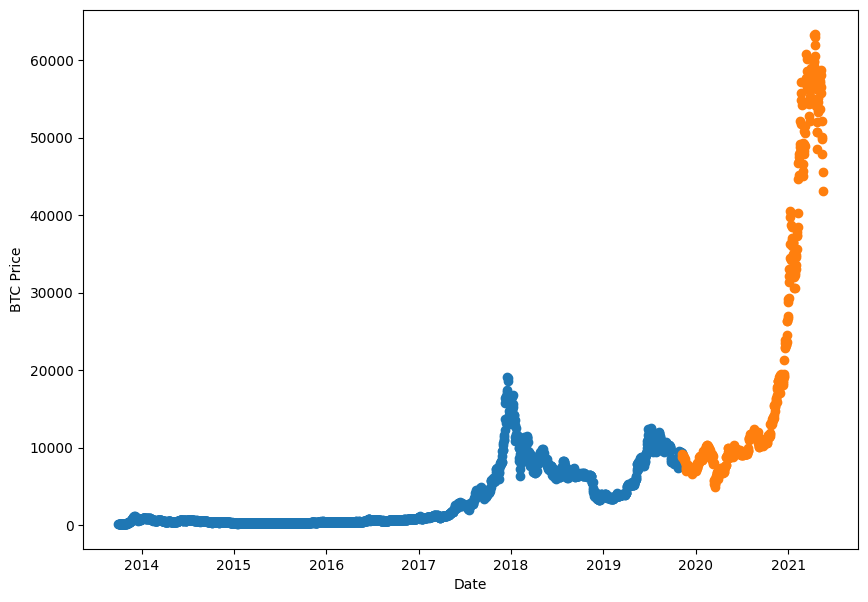

In [ ]:
# Plot the train and the test made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label="Train data")
plt.scatter(X_test, y_test, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")

# Modelling Training, Prediction and Forecasting

# Experiment 2.1:Build a baseline model:
naive model: use the previous timestep value to predict the next timestep value.
note: we are going to use the naive model as a baseline to compare the performances of other models throughout our experiments.

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1]

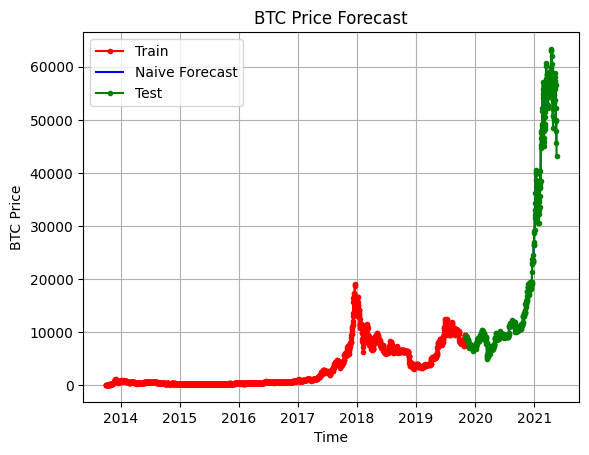

In [ ]:
# Plot the series
plt.figure()

# Plot training data
plt.plot(X_train, y_train, marker='.', label='Train', color='red')

# Plot naive forecast (line without markers)
plt.plot(X_test[:-1], naive_forecast, label='Naive Forecast', color = 'blue')

# Plot actual test data
plt.plot(X_test, y_test, marker='.', label='Test', color='green')

plt.xlabel("Time")
plt.ylabel("BTC Price")
plt.legend()
plt.title("BTC Price Forecast")
plt.grid(True)
plt.show()



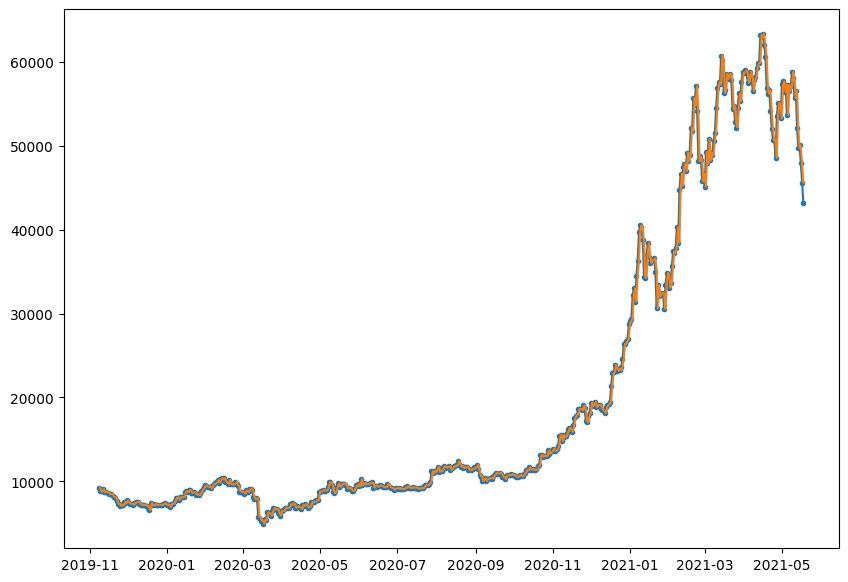

In [ ]:
# having a closer look on the test data and the predictions
plt.figure(figsize = (10,7))
plt.plot(X_test,y_test,label = 'test data',marker = '.')
plt.plot(X_test[1:],naive_forecast,label = 'naive forecast')


In [ ]:
# Evaluation of the naive model
# Measure the following metrics:
# Mean Average Error
# Mean Square Error
# Root Mean Square Error
# Mean Absolute Percentage Erro

# Calculate various metrics
y_true = tf.cast(y_test[1:], dtype=tf.float32)
y_pred = tf.cast(naive_forecast, dtype=tf.float32)

mae = np.mean(np.abs(y_true - y_pred))
mse = np.mean((y_true - y_pred) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("MAE:", mae, "MSE:", mse, "RMSE:", rmse, "MAPE:", mape)

MAE: 567.9802 MSE: 1147547.2 RMSE: 1071.2363 MAPE: 2.516525


# set the window size and horizon for forecasting

In [ ]:
# using windows to predict the data in the future

# Windows = time steps in the past used to predict the future
# Horizon = time steps in the future to be predicted

# Here our window size would be 30 and horizon would be 7
# Meaning, we need to predict bitcoin prices for 7 timesteps in future
# given prices for 30 days in the past

HORIZON = 1
WINDOW_SIZE = 30

# 1. a window of specific window_size (add the horizon on the end for later labelling)
window_step = np.expand_dims(np.arange(WINDOW_SIZE+HORIZON), axis=0)
# print(f"Window step:\n {window_step}")

# 2. a 2D array of multiple window steps
window_indices = window_step + np.expand_dims(np.arange(len(prices)-(WINDOW_SIZE+HORIZON-1)), axis=0).T

# 3. Index on the target array
window_array = prices[window_indices]

# get the labelled windows
windows,labels = window_array[:, :-HORIZON], window_array[:, -HORIZON:]

In [ ]:
# perform an 80/20 train-test split
split_size = int(len(windows) * (1-0.2))
train_windows = windows[:split_size]
train_labels = labels[:split_size]
test_windows = windows[split_size:]
test_labels = labels[split_size:]

In [ ]:
# check the shapes of the train and test
train_windows.shape,train_labels.shape,test_windows.shape,test_labels.shape

((2205, 30), (2205, 30), (552, 30), (552, 1))

# Experiment 2.2 Recurrent Neural Network(Long-Short Term Memory) Model

In [ ]:
# build an LSTM model using the functional API

# set the input layer
inputs = tf.keras.layers.Input((WINDOW_SIZE,))
# expand the dimensions of the input tensor to make
# it compatible with the LSTM layer
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# pass the temporal data through the lstm layer
x = tf.keras.layers.LSTM(64, activation="relu")(x) # using the tanh loss function results in a massive error
# add the output layer
output = tf.keras.layers.Dense(HORIZON)(x)

# create a resultant model
lstm_model = tf.keras.Model(inputs=inputs, outputs=output)

# Compile model
lstm_model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam())

# fit the model on the training data
lstm_model.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=30,
            validation_data=(test_windows, test_labels)),

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1342.9346 - val_loss: 1849.9961
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 319.8303 - val_loss: 1788.3236
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 294.9983 - val_loss: 1276.1315
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 240.0584 - val_loss: 1152.4313
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 203.8822 - val_loss: 1043.3062
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 185.3102 - val_loss: 997.4459
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 180.1340 - val_loss: 1155.3242
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 176.3715 - val_loss: 1111.4587
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 184.8959 - val_loss: 1004.7851
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 164.6162 - val_loss: 886.7593
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 166.4809 - val_loss: 893.3763
Epoch 12/

(<keras.src.callbacks.history.History at 0x7c6eb0a9d990>,)

In [ ]:
evaluation = lstm_model.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 541.4647


In [ ]:
print(f'the mean absolute error of an lstm model with window size of 30 and horizon of 1 is {evaluation:.2f}')

the mean absolute error of an lstm model with window size of 30 and horizon of 1 is 974.48


In [ ]:
# make predictions from the lstm model
lstm_predictions = lstm_model.predict(test_windows)



y_true = tf.cast(test_labels, dtype=tf.float32)
y_pred = tf.cast(lstm_predictions, dtype=tf.float32)

mae = np.mean(np.abs(y_true - y_pred))
mse = np.mean((y_true - y_pred) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("MAE:", mae, "MSE:", mse, "RMSE:", rmse, "MAPE:", mape)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MAE: 974.4783 MSE: 2383707.8 RMSE: 1543.926 MAPE: 4.7745986


In [ ]:
# model summary
lstm_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_2 (Lambda)                    │ (None, 1, 30)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          24,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,327 (290.34 KB)

 Trainable params: 24,775 (96.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 49,552 (193.57 KB)

In [ ]:
INTO_FUTURE = 7 # since our Bitcoin data is daily, this is for 14 days
future_forecasts = []
last_window = prices[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

# 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
for _ in range(INTO_FUTURE):

  # Predict using last window then append it to the current window size
  predictions = lstm_model.predict(tf.expand_dims(last_window, axis=0))

  # Append predictions to future_forecast
  future_forecasts.append(tf.squeeze(predictions).numpy())

  # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
  last_window = np.append(last_window, predictions)[-WINDOW_SIZE:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [ ]:
# Set the start and end dates
start_date = bitcoin_prices.index[-1] + np.timedelta64(1, "D")
end_date = bitcoin_prices.index[-1] + np.timedelta64(7, "D")

# Generate a range of future dates
next_time_steps= np.arange(start_date, end_date, np.timedelta64(1, "D"))


In [ ]:
# sync the two time steps for plotting
next_time_steps = np.insert(next_time_steps, 0, last_index)
future_forecasts = np.insert(future_forecasts, 0, bitcoin_prices.iloc[-1])

Text(0, 0.5, 'BTC Price')

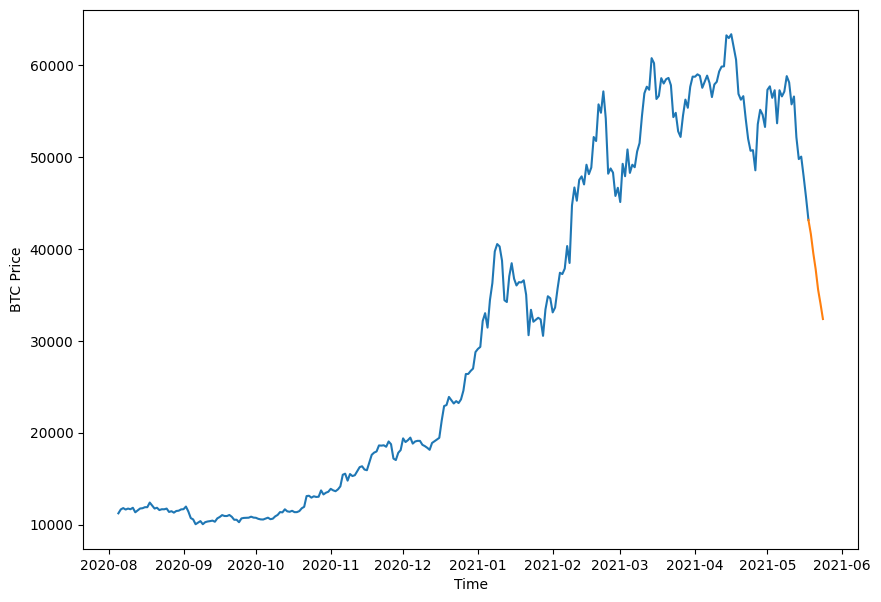

In [ ]:
# plot the bitcoin data along with the forecasting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(bitcoin_prices.index[2500:],bitcoin_prices[2500:], label= 'actual bitcoin prices')
plt.plot(next_time_steps, future_forecasts[:len(next_time_steps)], label= 'predicted bitcoin prices')
plt.xlabel("Time")
plt.ylabel("BTC Price")

**Comments:**

**Baseline [MAE: 567.9802 ,MSE: 1147547.2 ,RMSE: 1071.2363 ,MAPE: 2.516525]**

**LSTM Model:[MAE: 974.4783, MSE: 2383707.8, RMSE: 1543.926 ,MAPE: 4.7745986]**

Here we can observe that the naive model(baseline) performs better than all the metrics provided.Also there is an added disadvantage of increased runtime.

# Experiment 3: Use transfer learning for forecasting
in this experiment we are going to use transfer learning, meaning we can use a pretrained model on our timeseries, we will also make predictions and forecasting using the model.

# Model:Prophet Model by Facebook

In [ ]:
!pip install prophet
from prophet import Prophet

In [ ]:
bitcoin_prices = bitcoin_prices.rename(columns={'Date': 'ds','Price': 'y'  })
# Ensure ds is datetime type
bitcoin_prices['ds'] = pd.to_datetime(bitcoin_prices['ds'])

timesteps = bitcoin_prices.ds.to_numpy()
prices = bitcoin_prices.y.to_numpy()

# Create train data splits (everything before the split)
train_data = bitcoin_prices[:int(0.8 * len(prices))]

# Create test data splits (everything after the split)
test_data = bitcoin_prices[int(0.8 * len(prices)):]

In [ ]:
# build and customise the prophet model
prophet_model = Prophet(growth='linear',seasonality_mode='additive',interval_width=0.95)

In [ ]:
# fit the model on the bitcoin
prophet_model.fit(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpae5hhe9r/9_nllugk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpae5hhe9r/i8xwevli.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33903', 'data', 'file=/tmp/tmpae5hhe9r/9_nllugk.json', 'init=/tmp/tmpae5hhe9r/i8xwevli.json', 'output', 'file=/tmp/tmpae5hhe9r/prophet_modelfvlqarz3/prophet_model-20250418131628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:16:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:16:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# make predictions of the prophet model
predictions = prophet_model.predict(test_data)

In [ ]:
# convert the predictions to a numpy array
predictions.shape,type(predictions)

((558,), numpy.ndarray)

In [ ]:
true_values = test_data.y.to_numpy()
true_values.shape,type(true_values)

((558,), numpy.ndarray)

In [ ]:
mae = np.mean(np.abs(true_values - predictions))
mse = np.mean((true_values - predictions) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100

print(f"Evaluation metrics for the Prophet Model MAE: {mae:.2f}, MSE {mse:.2f}, RMSE, {rmse:.2f}, MAPE:, {mape:.2f}")

Evaluation metrics for the Prophet Model MAE: 10563.40, MSE 335676599.85, RMSE, 18321.48, MAPE:, 35.49


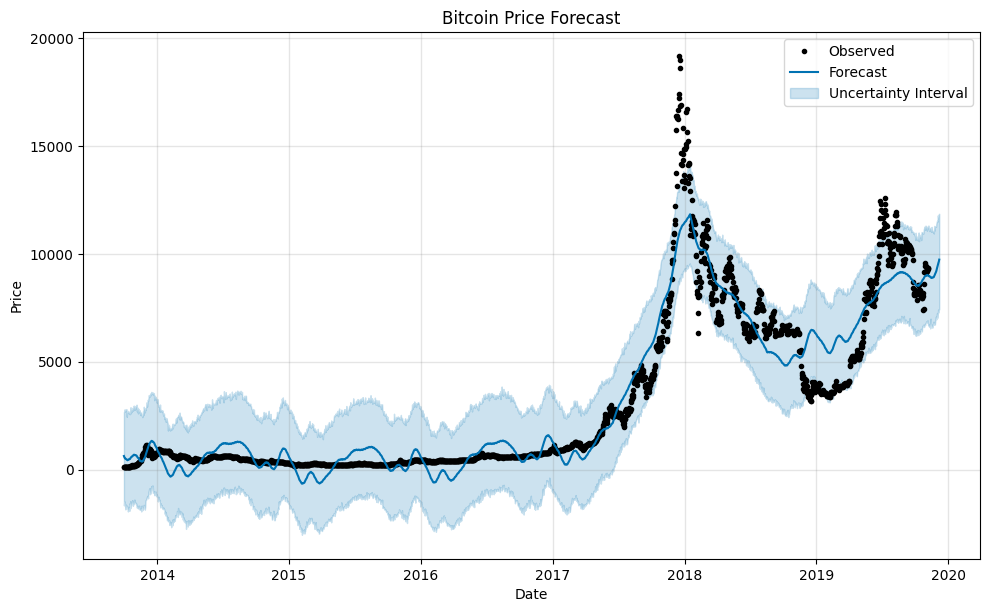

In [ ]:
# make forecasting for the next month using the Prophet Model

# Create future dataframe
future_timestep = prophet_model.make_future_dataframe(periods=30)
# make predictions
forecast = prophet_model.predict(future_timestep)
# plot the forecasting
fig = prophet_model.plot(forecast)
ax = fig.gca()  # Get current axes

# Add a legend
ax.legend(['Observed', 'Forecast', 'Uncertainty Interval'])
plt.title("Bitcoin Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

**Comments:**we can see that the prophet model generalise well to the data and is able to predict the rise and the fall in the trend in the dataset. Although there seems to be a lot of outliers which the model is not able to capture.

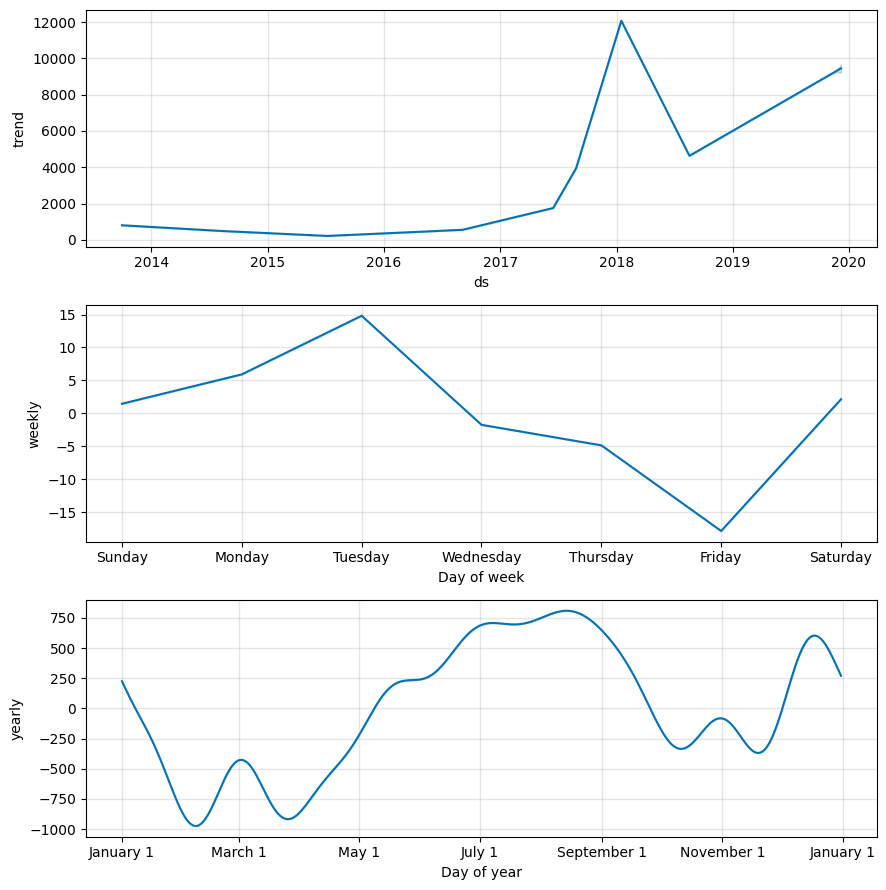

In [ ]:
# plot the seasonality component
prophet_model.plot_components(forecast)
plt.show()

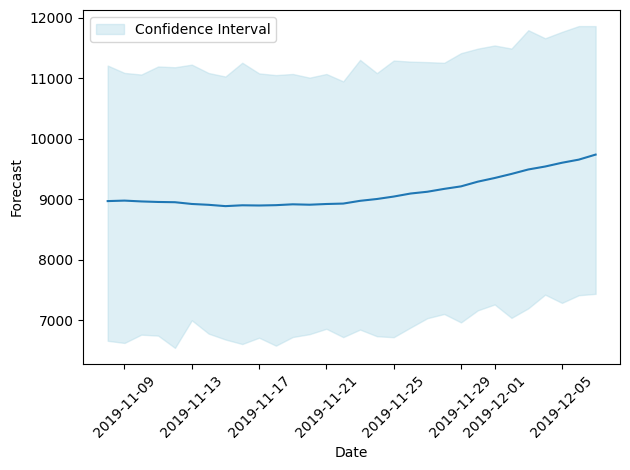

In [ ]:
# zoom in on the forecasting made by the Prophet Model
plt.plot(forecast['ds'][-30:], forecast['yhat'][-30:])
plt.fill_between(
    forecast['ds'][-30:],
    forecast['yhat_lower'][-30:],
    forecast['yhat_upper'][-30:],
    color='lightblue',
    alpha=0.4,
    label='Confidence Interval'
)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Forecast')
plt.legend()
plt.tight_layout()
plt.show()

**comments**:
**Baseline [MAE: 567.9802 ,MSE: 1147547.2 ,RMSE: 1071.2363 ,MAPE: 2.516525]**

**Prophet:[MAE: 10563.40, MSE 335676599.85, RMSE, 18321.48, MAPE:, 35.49]**

**LSTM Model:[MAE: 974.4783, MSE: 2383707.8, RMSE: 1543.926 ,MAPE: 4.7745986]**

We can observe that the transfer learning model performs the worst outof all the models on all the given metrics.



# Conclusion from the above experiments:
Since the LSTM and the transfer learning model were not able to beat the baseline model, there seems to be a lot of randomness(white noise) in the timeseries, we can also observe the same while performing additive seasonal decomposition that there is not a lot of trend, seasonal and cyclic component in the time series.

Seems like we encountering an issue known as the **Turkey Problem**, meaning problem of relying too heavily on historical data to make predictions especially in the absence of domain knowledge.

On the occurence of a Black Swan(an unexpected, high-impact event that is difficult to predict).
Example: Bitcoin crashes 70% overnight due to a massive selloff, regulation news, or a hacked exchange.
In this case, historical data gave no warning because the critical context(regulatory bans, economic factors) wasn’t in the data the models were trained on.

**Real Examples from Bitcoin:**
**2017:** Bitcoin surged to $20,000 by December 2017. Many believed it would keep rising based on the trend. Then it crashed 80% over the next year.

**2021-2022:** Rose to $69,000, then dropped to $16,000 after inflation fears, Fed hikes, and FTX's collapse.

While modeling financial data like crypto or stocks, it’s key to:

1.Include exogenous variables (like macroeconomic indicators)

2.Incorporate risk assessment

3.Avoid overfitting on limited historical trends